In [41]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import pandas as pd  
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [2]:
def create_dummy_data():
    output_x = 2 * np.random.rand(500,1)
    output_y = 4 +3 * output_x+np.random.randn(500,1)
    return (output_x, output_y)

In [24]:
(train_x, train_y) = create_dummy_data()
print(train_x.shape)
print(train_y.shape)

(500, 1)
(500, 1)


In [53]:
print("X : "+str(train_x[:10]))
print("Y : "+str(train_y[:10]))

X : [[1.75389083]
 [1.61323014]
 [0.11489834]
 [1.3863606 ]
 [1.56531228]
 [1.0710439 ]
 [1.72597857]
 [1.14640948]
 [0.10619184]
 [1.9401905 ]]
Y : [[ 9.45324798]
 [ 9.5551738 ]
 [ 3.53261798]
 [ 8.80251761]
 [10.13305472]
 [ 8.15854043]
 [ 9.6983095 ]
 [ 5.94086117]
 [ 5.40251492]
 [ 8.2426169 ]]


In [6]:
X = train_x
Y = train_y

In [8]:
print(X.shape)
print(W.T.shape)
print(X.T.shape)

(2, 1)
(500, 1)
(1, 2)
(1, 500)


In [11]:
#Defining model parameters
steps = X.shape[0]
batch_size = 50
epoch = 100
learning_rate = 0.001
#Augmenting the feature matrix by appending 1 for the bias term
X_extra = np.ones((X.shape[0], 1))
X_augmented = np.concatenate((X_extra, X), axis = 1)

In [12]:
X_augmented.shape

(500, 2)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_augmented, Y, test_size=0.20, random_state=42)

In [26]:
#This function returns mini batches in each epoch
def get_batch(X, Y, j, batch_size):
    start = j*batch_size
    end = start + batch_size
    if(end >= X.shape[0]):
        end = X.shape[0]
    return(X[start:end], Y[start:end], start, end)

In [27]:
#The core of Machine Learning GGGRRAAADIENT DESCENT! 
def gradient_descent(epoch, batch_size, learning_rate, X_augmented, Y, W):
    cost_dict = {}
    print(W)
    for i in range(epoch):
        print("--Epoch "+str(i))
        for j in range(math.ceil(X_augmented.shape[0]/batch_size)):
            print("----Batch "+str(j))
            (X_batch, Y_batch, start, end) = get_batch(X_augmented, Y, j, batch_size)
            print("----Start "+str(start)+" End "+str(end))
            Y_pred = np.dot(X_batch,W)
            y_diff = (Y_pred - Y_batch)
            partial_derivative = np.dot(X_batch.T, y_diff)
            W = W - (learning_rate*partial_derivative.T).T
            print("W shape: "+str((learning_rate*partial_derivative.T).shape))
            cost = (1/2) * np.sum((y_diff)**2)
            print("--------Cost "+str(cost))
            cost_dict[str(i)+"_"+str(j)] = cost
            print("--------Weight "+str(W))
        
    print(W)
    return (W, cost_dict)

In [30]:
W = np.zeros((X.shape[1]+1,1))
(weights, costs) = gradient_descent(epoch, batch_size, learning_rate, X_train, y_train, W)

[[0.]
 [0.]]
--Epoch 0
----Batch 0
----Start 0 End 50
W shape: (1, 2)
--------Cost 1385.8701443328728
--------Weight [[0.35786943]
 [0.42001691]]
----Batch 1
----Start 50 End 100
W shape: (1, 2)
--------Cost 1143.8027344876054
--------Weight [[0.6822771 ]
 [0.81345715]]
----Batch 2
----Start 100 End 150
W shape: (1, 2)
--------Cost 771.5176788842969
--------Weight [[0.95209457]
 [1.0865121 ]]
----Batch 3
----Start 150 End 200
W shape: (1, 2)
--------Cost 616.459234476496
--------Weight [[1.18954385]
 [1.34100612]]
----Batch 4
----Start 200 End 250
W shape: (1, 2)
--------Cost 649.1976297484998
--------Weight [[1.43333264]
 [1.6347971 ]]
----Batch 5
----Start 250 End 300
W shape: (1, 2)
--------Cost 396.53420779327956
--------Weight [[1.62410942]
 [1.84543248]]
----Batch 6
----Start 300 End 350
W shape: (1, 2)
--------Cost 355.5002901890445
--------Weight [[1.79961346]
 [2.01071907]]
----Batch 7
----Start 350 End 400
W shape: (1, 2)
--------Cost 285.5496782065005
--------Weight [[1.9585

 [3.0533759 ]]
----Batch 1
----Start 50 End 100
W shape: (1, 2)
--------Cost 23.900980220621026
--------Weight [[3.99775092]
 [3.05825126]]
----Batch 2
----Start 100 End 150
W shape: (1, 2)
--------Cost 25.65184161844664
--------Weight [[3.99772454]
 [3.05125471]]
----Batch 3
----Start 150 End 200
W shape: (1, 2)
--------Cost 23.086003549150984
--------Weight [[3.99010955]
 [3.04450625]]
----Batch 4
----Start 200 End 250
W shape: (1, 2)
--------Cost 22.84125903668781
--------Weight [[4.00380518]
 [3.06278495]]
----Batch 5
----Start 250 End 300
W shape: (1, 2)
--------Cost 23.451266598351058
--------Weight [[3.9939763 ]
 [3.04896095]]
----Batch 6
----Start 300 End 350
W shape: (1, 2)
--------Cost 32.163265777200344
--------Weight [[4.00170051]
 [3.06019488]]
----Batch 7
----Start 350 End 400
W shape: (1, 2)
--------Cost 25.018931202274608
--------Weight [[3.99514616]
 [3.05392578]]
--Epoch 51
----Batch 0
----Start 0 End 50
W shape: (1, 2)
--------Cost 29.770100398239876
--------Weight [

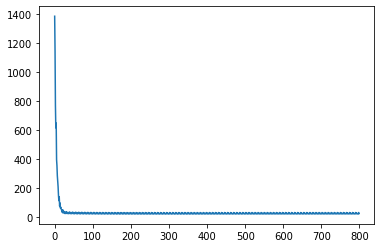

In [31]:
#Plotting training cost
arr = []
for v in costs:
    arr.append(costs[v])
plt.plot(arr)

In [40]:
#The trained weights/ coefficients returned by the model
weights

array([[4.03054399],
       [3.02334217]])

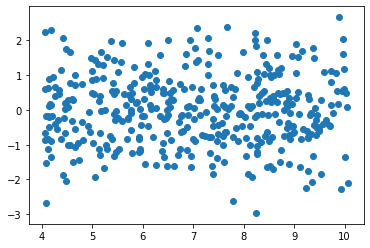

In [54]:
#Generating residual plot to verify if there is any trend in the residulas. 
#There is no trend in the residuals.

y_predicted = np.dot(X_train, weights)
y_residuals = y_train - y_predicted
plt.scatter(y_predicted, y_residuals)

In [55]:
#Making prediction on the test data
y_test_predicted = np.dot(X_test, weights)
#Calculating RMSE to gauge how the model performed on the test data
RMSE = math.sqrt(((y_test_predicted - y_test)**2).mean())
print(RMSE)

1.0851985655294858


In [64]:
#Calculating the correlation between the prediction on the test data and the actual observed value
np.corrcoef(y_test_predicted.reshape(100), y_test.reshape(100))

array([[1.        , 0.83934892],
       [0.83934892, 1.        ]])

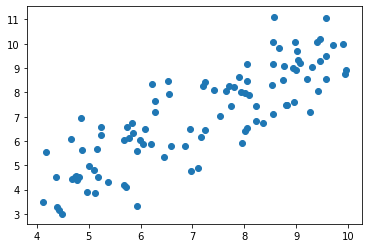

In [67]:
#Scatter plot between the prediction on the test data and the actual observed value. 
#The plot shows a significant trend betwen the predicted value and 
#the observed value(which is backed up by the correlation matrix)
plt.scatter(y_test_predicted, y_test)